# Setup, OpenCV, and Plotly

Run the code below to install a library of plotting functions that will be helpful. It will also import more libraries used in the quick checks below.

In [6]:
%pip install wheel
%pip install plotly==5.4.0
import plotly.express as px
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To read in the data needed for the workshop session, you'll need to 'mount' your Google Drive to the notebook and eventually provide paths to the image data.
1. A Google Drive folder called 'QMW_files' should have been shared with you earlier. If not, please contact Jonathan Jackson (jajack@mit.edu) or Mary Ann Collins (maryannc@mit.edu).
2. Open Google Drive (https://drive.google.com/drive/my-drive) and find 'QMW_files'. Right-click on it and select 'Add shortcut to Drive'. From the popup list, click 'ADD SHORTCUT'. If you click on the arrow next to 'My Drive', you should now see the folder listed.
3. Run the code block below. This will connect your Google Drive with this notebook and allow you to access the data contained in it. You will be asked to select your Google account and allow access.
4. Run the code block below that. If all has gone well, you should see an image of a few cells.

In [7]:
# Connect to Google drive to access required data and images.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


TypeError: ignored

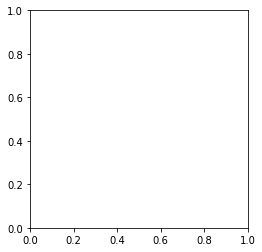

In [8]:
fname = '/content/gdrive/MyDrive/QMW_files/40491_noise.tif'
# Format for any file needed should be '/content/gdrive/MyDrive/QMW_files/<FILENAME>'
img = cv2.imread(fname)
plt.imshow(img)
plt.gcf().set_size_inches(10, 10) # Play around with these values to see if you can make the image bigger/smaller
plt.show()

Plotly is a library for making nice, interactive plots. Run the line of code below (it might take a slightly longer time) to plot the same image as above. Hover your cursor over the image to see the intensity of each channel in [red, green, blue] format. We'll also use Plotly to look through datasets that include a time or depth dimension in addition to the width, height, and color dimensions used in the current image.

In [ ]:
px.imshow(img)

## Warning about the unsigned 8-bit integer data type

Most often, image data is (unsigned) 8-bit, meaning each pixel value is an integer from 2<sup>0</sup>-1 = 0 to 2<sup>8</sup>-1 = 255. Because of this, in Python at least, you can get some very surprising results from basic math.

In [ ]:
testArray = np.array([-1, 0, 15, 30, 255, 256])
testArray8 = testArray.astype(np.uint8) # np.astype() will adjust data type. uint8 is unsigned 8-bit integer. testArray's data type is int64
print(testArray8) # Look at the first and last entries now
print(testArray - 20)
print(testArray8 - 20)

Any time you exceed the 0-255 range with the uint8 data type, you essentially roll over to the other end of the data range. Be careful when doing 'simple' math with this type of data!

One of the exercises in the workshop will involve this problem. The conversion from uint8 to int16 is included already, and your job will be to convert back to uint8 after the image is manipulated.

# FIJI + the MorphoLibJ plugin

[FIJI](https://imagej.net/software/fiji/) (***F***IJI ***I***s ***J***ust ***I***mageJ), and its earlier incarnation, ImageJ, are excellent, free, and open-source tools for viewing images and performing a huge variety of processing/analysis operations on them. While this workshop is mainly Python-based, FIJI is such a useful and versatile package that you should try it out alongside the Python exercises.

FIJI comes with a fairly comprehensive set of image processing tools, but one nice feature of FIJI is the multitude of *plugins* available to provide even more functions. Of these, MorphoLibJ is a great resource for implementing several of the techniques you'll be using in the workshop.

## Installing FIJI and exploring a little

To install FIJI, please follow the [installation instructions](https://imagej.net/software/fiji/downloads). Everything you need to get started should be included in the download and installation instructions on this page.

* Download any of the images in the 'QMW_files' folder ('112419_EcadGFP_live_rotated_cropped_everyFourth' is a good example, since it includes both z and time dimensions, but it's not a small file).
* Open the FIJI application. You should see a menu bar somewhere on your screen. FIJI is somewhat overwhelming and hard to navigate at first (the dropdown menus can have dropdown menus that sometimes have dropdown menus, and so on...), but for this workshop, the relevant commands will be provided.
* Locate the image file you downloaded. Drag and drop it onto the FIJI bar. Alternatively, Go to **File > Open...** to select your image file from the navigator that opens.
* You should now see the image with sliders at the bottom if the image has three or more dimensions. For images, there are generally five possible dimensions:
  * Width
  * Height
  * Depth (z)
  * Color (c) - for example, an image with a nucleus channel and a membrane channel will have two colors.
    * Note that the RGB file format (for example, the format of the file used above) is only read as one color. You can get back to three channels, one per color, using **Image > Color > Split Channels** and **Image > Color > Merge Channels**.
    * If you open 40491_noise in FIJI, you might notice something odd with the color scheme compared to the version in Python above. This is actually a quirk of cv2, not FIJI, that will be discussed in the exercises.
  * Time (t)
* Play around with the sliders and see how the image changes. If you opened a dataset with a time dimension, click the small triangle next to the bar at the bottom (or hit the '\\' key) to start or stop the movie.
* FIJI always shows you xy-planes, while the bars at the bottom let you step through the c, z, or t dimensions.
* Explore a little to get an idea of what FIJI allows you to do. In particular, the **Image > Stacks** commands have some useful functions for visualizing data, while the **Process** menu has nice functions to smooth, denoise, and so on.
* It can be surprisingly easy to ask FIJI to do something that will exceed your computer's memory or just take forever to run, especially with larger datasets. You'll typically receive an error message for memory issues, but *don't be afraid to force quit FIJI if necessary*. You can also allocate more memory to FIJI using **Edit > Options > Memory and Threads...** if you absolutely have to.

## Installing MorphoLibJ

On [this](https://imagej.net/plugins/morpholibj) page, scroll down to the 'Installation' section and follow the instructions there. The MorphoLibJ page linked here also has a good overview of all the tools included in the plugin.

* For our purposes, we'll just use the Interactive Marker-controlled Watershed. If you're interested in some conceptual background for the workshop exercises, glance over the 'Morphological filters', 'Watershed segmentation', and 'Distance transform' sections.

# Very important note on image analysis

Google is your best friend. *Very* often with image analysis (in both Python and FIJI), someone else has had the same problem as you and has found a solution, and that solution is online.
* If a function doesn't seem to be working, consider Googling it and reading the documentation to make sure your arguments are correct. The same is true for FIJI commands - they often have very helpful documentation pages.
* Stack Overflow and other forums are invaluable for issues ranging from installation problems to big-picture ideas for image segmentation.
  * Google Colab even gives you a 'SEARCH STACK OVERFLOW' button when you get an error!

All that said, please don't simply Google and copy+paste answers to the exercises in this workshop, although you can and should search documentation and error messages you receive - that's part of the process.